In [1]:
! pip install torchinfo
try:
    import torchaudio
except:
    ! pip install torchaudio

In [38]:
import collections
from os.path import join

from scipy import signal
import librosa
import librosa.display
from IPython.display import Audio
import IPython as ip
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio
import torchaudio.transforms as T

# barras de progreso
from tqdm.auto import trange

In [8]:
DATA_DIR = '/home/felix/Project/data'
subset ='libri3mix_dev'

def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


In [4]:
ds = torchaudio.datasets.LibriMix(root = DATA_DIR , 
                             subset = 'libri3mix_dev', 
                             num_speakers = 2, 
                             sample_rate  = 8000, 
                             task =  "enh_both")

In [5]:
len(ds)

3000

# Data exploration

In [6]:
sample_rate, waveform, source_waveforms =  ds[0]

In [25]:
# Podemos observar que el dataloader nos da los audios como tensores
type(waveform)

torch.Tensor

In [27]:
# Los pasamos a arreglos de numpy para poder graficarlos

waverform_numpy = waveform.flatten().numpy()
source1 = source_waveforms[0].flatten().numpy()
source2 = source_waveforms[1].flatten().numpy()

<Figure size 432x288 with 0 Axes>

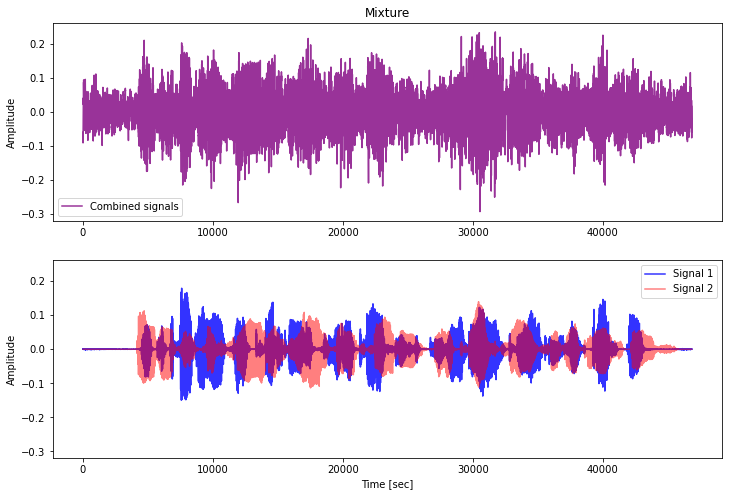

In [36]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,8), sharey=True)

ax1.plot(waverform_numpy, color="purple", alpha = 0.8)
ax1.set(title='Mixture', ylabel='Amplitude')
ax1.legend(['Combined signals'])

ax2.plot(source1,color="blue", alpha = 0.8)
ax2.plot(source2,color="red", alpha = 0.5)
ax2.set(xlabel='Time [sec]', ylabel='Amplitude')
ax2.legend(['Signal 1', 'Signal 2'])

plt.show()


In [39]:

f1, t1, Zsamples1 = signal.stft(source1, fs=sample_rate)
f2, t2, Zsamples2 = signal.stft(source2, fs=sample_rate)
fmixed, tmixed, Zmixed_series = signal.stft(waverform_numpy , fs=sample_rate)

<Figure size 432x288 with 0 Axes>

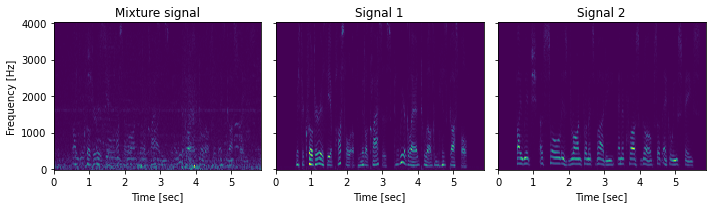

In [40]:
#%% Plot magnitude spectrogram of 3 wav files
fig = plt.figure() 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3), sharey=True)

ax1.pcolormesh(tmixed, fmixed, np.abs(Zmixed_series))
ax1.set(title='Mixture signal', xlabel='Time [sec]', ylabel='Frequency [Hz]')

ax2.pcolormesh(t1, f1, np.abs(Zsamples1))
ax2.set(title='Signal 1', xlabel='Time [sec]')

ax3.pcolormesh(t2, f2, np.abs(Zsamples2))
ax3.set(title='Signal 2', xlabel='Time [sec]')

plt.tight_layout()
#fig.savefig("spectrograms.png", bbox_inches="tight")
plt.show()
plt.close(fig)